In [2]:
#Importando Bibliotecas

import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import numpy as np
import matplotlib.ticker as ticker
from numpy.random import randint
import math as Math
import matplotlib.dates as mdates

a1 = [["13/03/2020","151.0"],
      ["14/03/2020","151.0"],
      ["15/03/2020","162.0"],
      ["16/03/2020","200.0"],
      ["17/03/2020","321.0"],
      ["18/03/2020","372.0"],
      ["19/03/2020","621.0"],
      ["20/03/2020","793.0"],
      ["21/03/2020","1021.0"],
      ["22/03/2020","1593.0"],
     ["23/03/2020" ,"1891.0"],
     ["24/03/2020","2201.0"],
     ["25/03/2020","2433.0"],
     ["26/03/2020","2915.0"]]
df4=pd.DataFrame(a1, columns=["Dias","Infectados"])
dias_infec= df4["Infectados"]
dias_data=df4["Dias"]

x = dias_infec
y = dias_data

df_mortes=pd.read_csv("mortes.csv")
df_mortes.rename(columns={"Country/Region":"País"}, inplace=True)
df_mortes.drop(df_mortes.index[0], inplace=True)
df_mortes["Data"]=pd.to_datetime(df_mortes["Data"])
df_mortes["Data"]=df_mortes["Data"].dt.strftime("%d/%m/%Y")
df_mortes.head()

,País,Data,Mortes
1,Brasil,17/03/2020,1.0
2,Brasil,18/03/2020,3.0
3,Brasil,19/03/2020,6.0
4,Brasil,20/03/2020,11.0
5,Brasil,21/03/2020,15.0


In [3]:
#Regra de crição de grafico:
def grafico_covid():
#Graficos morte
    e =df_mortes["Data"]
    z = df_mortes["Mortes"]  
    plt1.figure(figsize=(10,11))
    plt1.plot(z,e, color="black",linewidth=3,markerfacecolor="red",markersize=7,marker="s")
    plt1.title("Dados de Mortos pelo COVID-19 No BRASIL:")
    plt1.xlabel("\n\nMortes")
    plt1.xticks(z)
    plt1.yticks(e)
    plt1.ylabel("Dias")
   # plt1.yscale("linear")
    plt1.xticks(rotation=0)
    plt1.grid()
    plt1.savefig('imagens/death.png') 
    plt1.show()
    
    #Grafico infectados
    plt.figure(figsize=(10,11)) # Referente ao tamanho do grafico
    mark_dot=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
    plt.plot(x,y, color="black",linewidth=5,markerfacecolor="red",markersize=7,marker="s",markevery=mark_dot) # Informando as variaveis que serão utilizadas para representar o grafico
    plt.title("Infectados no Brasil:", fontsize=15) # Titulo do grafico
    plt.xlabel("Infectados:", fontsize=15) # Titudo do eixo X
    plt.ylabel("Dias em que se mantiveram o valor de infectados:", fontsize=15) #Titulo do eixo Y
    plt.xticks(x) # Define o ponto inicial do ticks 
    plt.xticks(rotation=45, fontsize=15) # Define a rotação da lengenda do indice X ,Define o tamanho de fonte dos indices X
    plt.yticks(fontsize=15)  # Define o tamanho da  fonte dos indices Y
    plt.grid() # Adicionar linhas guias no grafico
    plt.savefig('imagens/infectos_brasil.png') # Salvando em PNG o grafico ,lembrar de criar a pasta


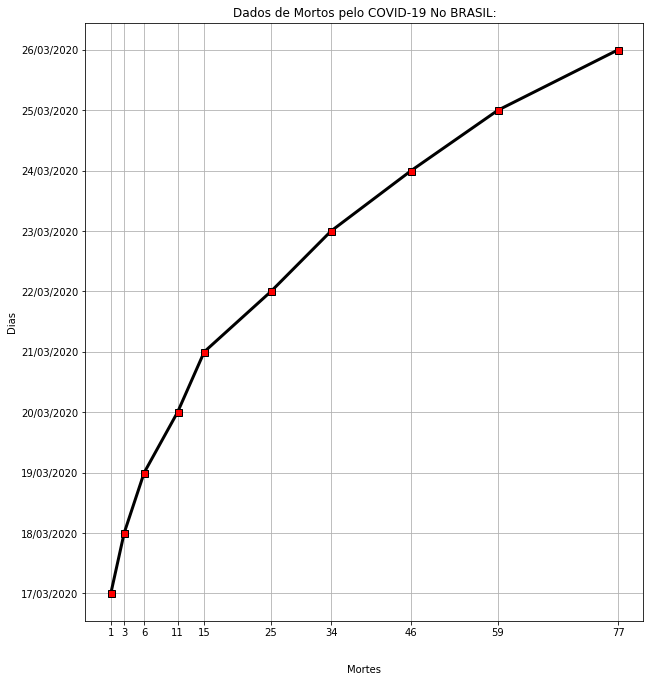

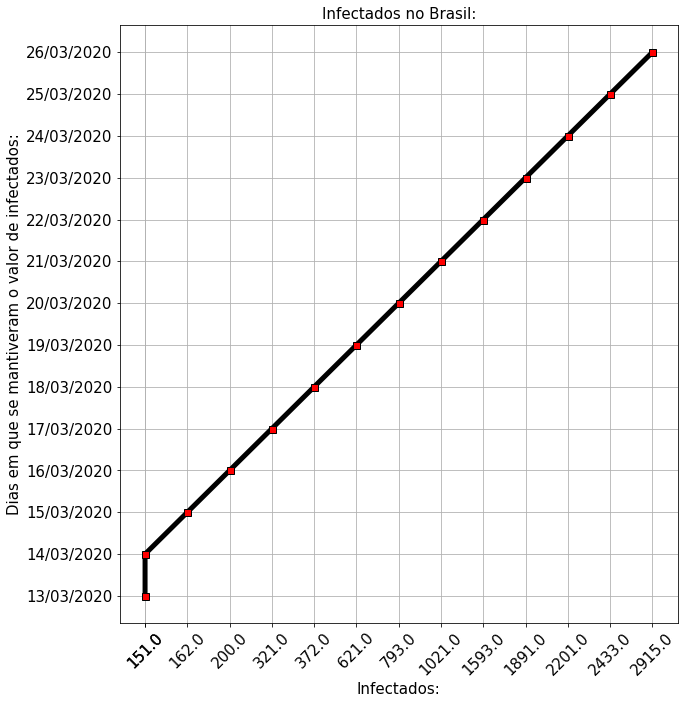

In [4]:
grafico_covid()